# **[라이브러리/데이터 불러오기]**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = "/content/drive/MyDrive/KUBIG/ML 프로젝트"

df_train = pd.read_csv(PATH+"/train.csv")
df_test = pd.read_csv(PATH+"/test.csv")

# **[데이터 살펴보기(EDA)]**

In [ ]:
print(df_train.shape)
print(df_train.info())
df_train.head()

(26457, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
print(df_test.shape)
print(df_test.info())
df_test.head()

(10000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [ ]:
print(df_train['FLAG_MOBIL'].unique())
print(df_test['FLAG_MOBIL'].unique())

[1]
[1]


train, test 데이터 모두 값이 1로 동일함으로 전처리시 'FLAG_MOBIL'은 삭제

In [ ]:
# 상관계수 분석
df_train.drop(["index","FLAG_MOBIL","work_phone","phone","email"],axis=1).corr()["credit"]

child_num        0.004081
income_total     0.008555
DAYS_BIRTH      -0.025187
DAYS_EMPLOYED   -0.003798
family_size      0.008227
begin_month     -0.147477
credit           1.000000
Name: credit, dtype: float64

credit과 뚜렷한 상관관계를 보이는 변수는 없다.

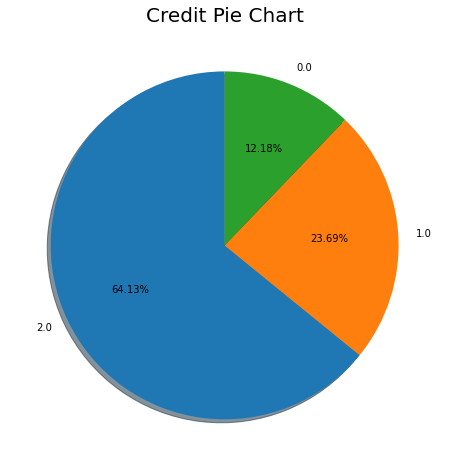

In [ ]:
plt.subplots(figsize = (8,8))
plt.pie(df_train['credit'].value_counts(), labels = df_train['credit'].value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('Credit Pie Chart', size=20)
plt.show()

낮을수록 높은 신용의 신용카드 사용자를 뜻한다. \
따라서 낮은 신용의 신용카드 사용자가 많다는 것을 알 수 있다.

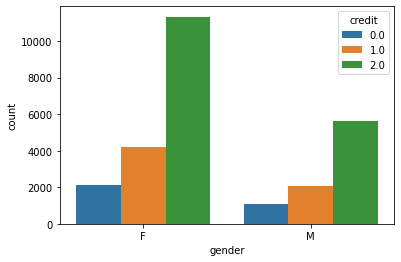

In [ ]:
# 성별
sns.countplot('gender',hue='credit',data=df_train)

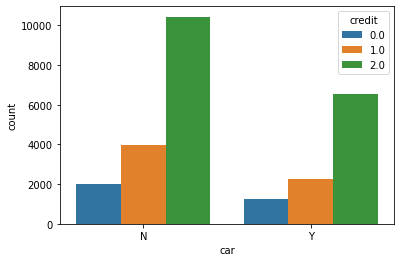

In [ ]:
# 차량소유여부
sns.countplot('car',hue='credit',data=df_train)

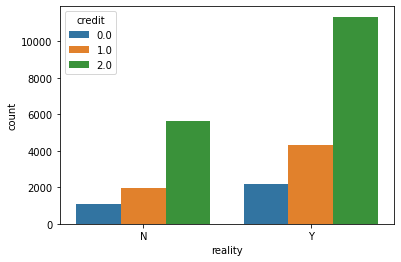

In [ ]:
# 부동산 소유여부
sns.countplot('reality',hue='credit',data=df_train)

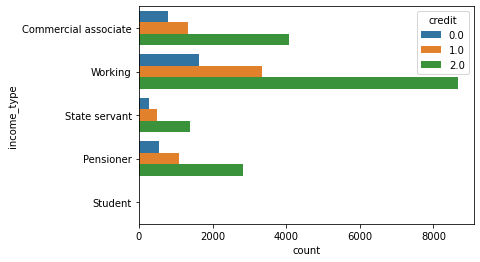

In [ ]:
# 소득 분류
sns.countplot(y='income_type',hue='credit',data=df_train)

Pensioner는 연금 수령자며, 나머지는 대부분 노동자임을 알 수 있다.

In [ ]:
print(df_train['income_type'].value_counts())
print(df_test['income_type'].value_counts())

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64
Working                 5174
Commercial associate    2288
Pensioner               1703
State servant            831
Student                    4
Name: income_type, dtype: int64


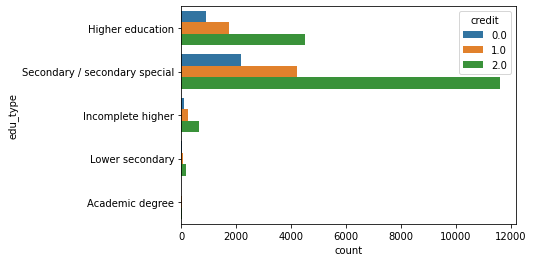

In [ ]:
# 교육 수준
sns.countplot(y='edu_type',hue='credit',data=df_train)

In [ ]:
print(df_train['edu_type'].value_counts())
print(df_test['edu_type'].value_counts())

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64
Secondary / secondary special    6782
Higher education                 2702
Incomplete higher                 390
Lower secondary                   117
Academic degree                     9
Name: edu_type, dtype: int64


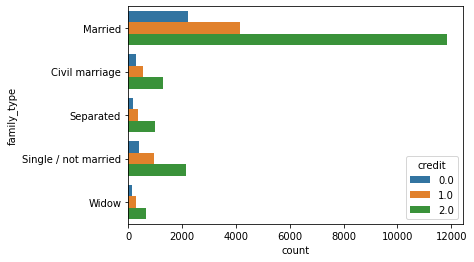

In [ ]:
# 결혼 여부
sns.countplot(y='family_type',hue='credit',data=df_train)

결혼 상태에따라 신용도가 달라짐을 볼 수 있습니다. 유의미한 변수입니다.

In [ ]:
# occyp_type
print(df_train['occyp_type'].value_counts())
print(df_test['occyp_type'].value_counts())

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64
Laborers                 1699
Sales staff               946
Core staff                945
Managers                  845
Drivers                   563
Medicine staff            343
High skill tech staff     343
Accountants               339
Cooking staff             198
Security staff            168
Cleaning staff            148
Private service staff     101
Secretaries                54
Waiters/barmen staff       50
Low-skill

In [ ]:
# child_num
print(df_train['child_num'].value_counts())
print(df_test['child_num'].value_counts())

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64
0    6861
1    2106
2     894
3     113
4      16
5      10
Name: child_num, dtype: int64


자녀수가 5명 초과시 이상치로 봐도 무방

In [ ]:
# family_size
print(df_train['family_size'].value_counts())
print(df_test['family_size'].value_counts())

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64
2.0    5357
1.0    1878
3.0    1789
4.0     846
5.0     106
6.0      14
7.0      10
Name: family_size, dtype: int64


자녀수가 7명 초과시 이상치로 봐도 무방

In [ ]:
# family_size - child_num
print('train', (df_train['family_size'] - df_train['child_num']).unique())
print('test', (df_test['family_size'] - df_test['child_num']).unique())

train [ 2.  1.  0. -1.]
test [ 2.  1. -1.  0.]


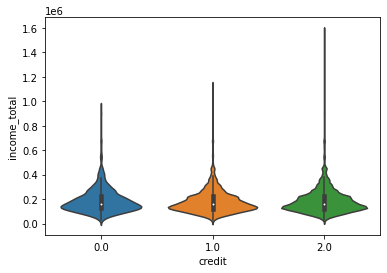

In [ ]:
# 총 소득
sns.violinplot('credit','income_total',data=df_train,split=True)

# **[데이터 전처리]**

**(주의) train data에 해준 그대로 test data 전처리!!!**

## **1. 불필요 변수 제거**

FLAG_MOBIL은 모두 1이므로 모델링에 별로 유의미한 정보가 아니기에 제거. \
index 번호도 제거.

In [ ]:
df_train.drop(['index','FLAG_MOBIL'],inplace=True,axis=1)
df_test.drop(['index','FLAG_MOBIL'],inplace=True,axis=1)

## **2. 수치형 데이터 전처리**

"DAYS_EMPLOYED"에서 양수는 무직자를 뜻하므로 0으로 대체한다.

In [ ]:
df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
df_test['DAYS_EMPLOYED'] = df_test['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)

"begin_month", "DAYS_BIRTH", "DAYS_EMPLOYED" 변수에서 음수를 양수로 변환.

In [ ]:
# DAYS_BIRTH 모두 양수로 변환
df_train['DAYS_BIRTH'] = np.abs(df_train['DAYS_BIRTH'])
df_test['DAYS_BIRTH'] = np.abs(df_test['DAYS_BIRTH'])

# DAYS_EMPLOYED 모두 양수로 변환
df_train['DAYS_EMPLOYED'] = np.abs(df_train['DAYS_EMPLOYED'])
df_test['DAYS_EMPLOYED'] = np.abs(df_test['DAYS_EMPLOYED'])

# begin_month 모두 양수로 변환
df_train['begin_month'] = np.abs(df_train['begin_month'])
df_test['begin_month'] = np.abs(df_test['begin_month'])

나이 데이터 파생변수 추가 (년, 월, 주)

In [ ]:
# 산 나이 (년, 월, 주) 각각 age_y, age_m, age_w 추가
df_train['age_y'] = df_train['DAYS_BIRTH'] // 365
df_test['age_y'] = df_test['DAYS_BIRTH'] // 365
df_train['age_m'] = df_train['DAYS_BIRTH'] % 365 // 30
df_test['age_m'] = df_test['DAYS_BIRTH'] % 365 // 30
df_train['age_w'] = df_train['DAYS_BIRTH'] % 365 % 30 // 7
df_test['age_w'] = df_test['DAYS_BIRTH'] % 365 % 30 // 7

근속 기간 (년,월,주) 파생변수 추가


In [ ]:
# 일한 기간 (년, 월, 주) 각각 working_y, working_m, working_w 추가
df_train['working_y'] = df_train['DAYS_EMPLOYED'] // 365
df_test['working_y'] = df_test['DAYS_EMPLOYED'] // 365
df_train['working_m'] = df_train['DAYS_EMPLOYED'] % 365 // 30
df_test['working_m'] = df_test['DAYS_EMPLOYED'] % 365 // 30
df_train['working_w'] = df_train['DAYS_EMPLOYED'] % 365 % 30 // 7
df_test['working_w'] = df_test['DAYS_EMPLOYED'] % 365 % 30 // 7

## **3. 결측치 처리** 

In [ ]:
df_train.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
age_y               0
age_m               0
age_w               0
working_y           0
working_m           0
working_w           0
dtype: int64

In [ ]:
df_test.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
age_y               0
age_m               0
age_w               0
working_y           0
working_m           0
working_w           0
dtype: int64

결측치는 "occyp_type" 변수만 포함되어 있습니다

In [ ]:
# null을 모두 결측치(missing)으로 표기기
df_train.fillna("missing",inplace=True)
df_test.fillna("missing",inplace=True)

DAYS_EMPLOYED가 0이고 occyp_type이 None이면 무직자라고 판단. \
DAYS_EMPLOYED가 0이 아니고 occyp_type이 None이면 결측치라고 판단.

In [ ]:
# DAYS_EMPLOYED == 0 && occyp_type == None은 무직자
df_train.loc[((df_train['DAYS_EMPLOYED']== 0) & (df_train['occyp_type'] == "missing")),'occyp_type'] = 'No_Job'
df_test.loc[((df_test['DAYS_EMPLOYED']== 0) & (df_test['occyp_type'] == "missing")),'occyp_type'] = 'No_Job'

Laborers                 4512
No_Job                   4438
missing                  3733
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64


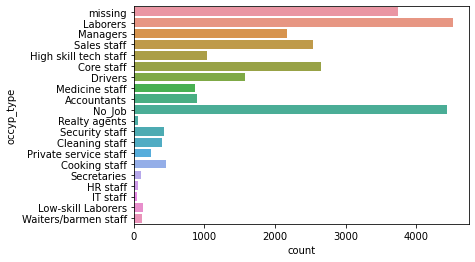

In [ ]:
print(df_train["occyp_type"].value_counts())
sns.countplot(y="occyp_type",data=df_train)

무직자가 상당히 많음을 알 수 있습니다.

In [ ]:
# 확인용
print(df_train.isna().sum())
print(df_test.isna().sum())

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
age_y            0
age_m            0
age_w            0
working_y        0
working_m        0
working_w        0
dtype: int64
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
age_y            0
age_m            0
age_w            0
working_y        0
working_m        0
working_w        0
dtype: int64


## **4. Binary Variable Encoding**

"gender", "car", "reality" 변수의 encoding 형태를 1/0으로 변형해줍니다.

In [ ]:
df_train['gender'] = df_train['gender'].replace(['F','M'],[0,1])
df_test['gender'] = df_test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(df_train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
df_train['car'] = df_train['car'].replace(['N','Y'],[0,1])
df_test['car'] = df_test['car'].replace(['N','Y'],[0,1])
print(df_train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
df_train['reality'] = df_train['reality'].replace(['N','Y'],[0,1])
df_test['reality'] = df_test['reality'].replace(['N','Y'],[0,1])
print(df_train['reality'].value_counts())
print('--------------')
      
print('Having a phone or not: ')
print(df_train['phone'].value_counts())
print('--------------')
      

print('Having a email or not: ')
print(df_train['email'].value_counts())
print('--------------')
      

print('Having a work phone or not: ')
print(df_train['work_phone'].value_counts())
print('--------------')

gender :
0    17697
1     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64
--------------
Having a phone or not: 
0    18672
1     7785
Name: phone, dtype: int64
--------------
Having a email or not: 
0    24042
1     2415
Name: email, dtype: int64
--------------
Having a work phone or not: 
0    20511
1     5946
Name: work_phone, dtype: int64
--------------


In [ ]:
# 통신 정보를 통합한 communication 변수 생성 
# phone, work_phone, email 변수 삭제제
df_train['communication']=0
df_test['communication']=0
for col in ['phone','work_phone','email']:
    df_train['communication']+=df_train[col]
    df_train=df_train.drop(col,axis=1)
for col in ['phone','work_phone','email']:
    df_test['communication']+=df_test[col]
    df_test=df_test.drop(col,axis=1)

## **5. Multicategory Variable Encoding**

In [ ]:
multi_col = ['income_type','edu_type','family_type','house_type','occyp_type']

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in multi_col:
    encoder = LabelEncoder()
    df_train[col] = encoder.fit_transform(df_train[col])
    df_test[col] = encoder.transform(df_test[col])

## **6. Numerical Variables**

###Encoding 이후 불필요 변수 삭제

In [ ]:
df_train.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],inplace=True,axis=1)
df_test.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],inplace=True,axis=1)

###family_size 변수 -> 이상치 처리

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64


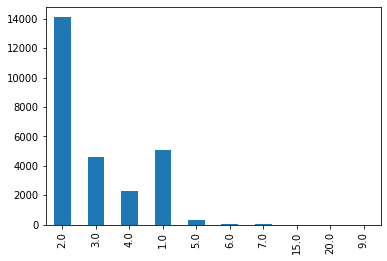

In [ ]:
print(df_train['family_size'].value_counts())
df_train['family_size'].value_counts(sort=False).plot.bar()

2.0    5357
1.0    1878
3.0    1789
4.0     846
5.0     106
6.0      14
7.0      10
Name: family_size, dtype: int64


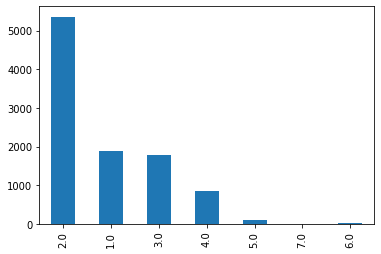

In [ ]:
print(df_test['family_size'].value_counts())
df_test['family_size'].value_counts(sort=False).plot.bar()

In [ ]:
# 부양 가족수가 7명 초과면 제거
df_train = df_train[(df_train['family_size'] <= 7)]

###child_num 변수 -> 삭제

In [ ]:
print(df_train['family_size'].corr(df_train['child_num']))

0.8861354475336642


child_num은 family_size와 상관관계가 높은 것이 확인된다. 다중공산성이 의심됨으로 child_num변수도 삭제해준다.

In [ ]:
df_train.drop(["child_num"],axis=1,inplace=True)
df_test.drop(["child_num"],axis=1,inplace=True)

###income_total 변수 -> 로그 변환

(array([1.6209e+04, 8.3270e+03, 1.5300e+03, 2.0600e+02, 1.2100e+02,
        4.4000e+01, 3.0000e+00, 2.0000e+00, 4.0000e+00, 5.0000e+00]),
 array([  27000.,  181800.,  336600.,  491400.,  646200.,  801000.,
         955800., 1110600., 1265400., 1420200., 1575000.]),
 <a list of 10 Patch objects>)

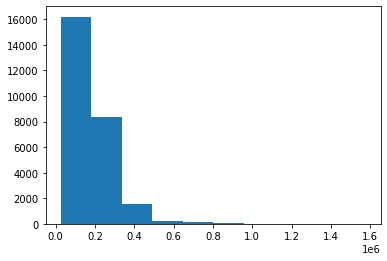

In [ ]:
plt.hist(df_train["income_total"],bins=10)

income_total 변수의 경우 분포가 right-skewed 되어 있음을 확인할 수 있다. 따라서 로그 변환을 해주는 것이 적절할 것이다.

In [ ]:
# log transformation
for df in [df_train,df_test]:
    df['income_total'] = np.log1p(1+df['income_total'])

(array([  84.,  341., 2788., 7264., 7714., 5502., 2362.,  308.,   77.,
          11.]),
 array([10.20366622, 10.6102763 , 11.01688639, 11.42349648, 11.83010657,
        12.23671666, 12.64332675, 13.04993683, 13.45654692, 13.86315701,
        14.2697671 ]),
 <a list of 10 Patch objects>)

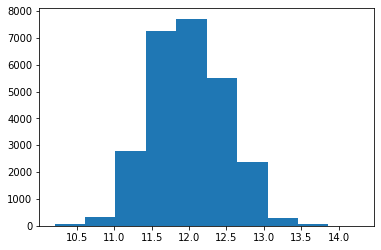

In [ ]:
#변경된 히스토그램
plt.hist(df_train["income_total"],bins=10)

###Clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans_train = df_train.drop(['credit'], axis=1)
kmeans = KMeans(n_clusters=36, random_state=42).fit(kmeans_train)
df_train['cluster'] = kmeans.predict(kmeans_train)
df_test['cluster'] = kmeans.predict(df_test)

###정규화

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_feats = ['income_total','family_size','begin_month','age_y','age_m','age_w','working_y','working_m','working_w']
numerical_feats.remove('income_total')
scaler = StandardScaler()
df_train[numerical_feats] = scaler.fit_transform(df_train[numerical_feats])
df_test[numerical_feats] = scaler.transform(df_test[numerical_feats])

In [ ]:
df_train.head()

,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,occyp_type,family_size,begin_month,credit,age_y,age_m,age_w,working_y,working_m,working_w,communication,cluster
0,0,0,0,12.218505,0,1,1,2,19,-0.216262,-1.215242,1.0,-0.452826,-1.640986,1.886201,0.994253,1.427217,2.303984,0,11
1,0,0,1,12.419174,0,4,0,1,8,0.897294,-1.275633,1.0,-1.060773,-1.064445,-1.315487,-0.250471,-0.705264,0.575849,1,4
2,1,1,1,13.017007,4,1,1,1,10,-0.216262,-0.248981,2.0,0.763069,-0.776175,0.285357,0.994253,-0.971824,1.439917,1,2
3,0,0,1,12.218505,0,4,1,1,15,-0.216262,0.656889,0.0,-0.192277,-0.487905,-1.315487,-0.094880,0.894097,1.439917,1,18
4,0,1,1,11.967193,2,1,1,1,10,-0.216262,-0.007416,2.0,-0.192277,-1.064445,-0.515065,-0.094880,1.160657,-0.288219,0,23


# **[데이터 모델링]**

In [ ]:
train_x=df_train.drop('credit', axis=1)
train_y=df_train[['credit']]
test=df_test

In [ ]:
print(train_x.shape, train_y.shape, test.shape)

(26451, 19) (26451, 1) (10000, 19)


##XGBClassifier

In [ ]:
import optuna 
from sklearn.model_selection import StratifiedKFold

def objective(trial):

  param = {
    "n_estimators" : trial.suggest_int("n_estimators" , 5000 ,10000),
    'max_depth': trial.suggest_int("max_depth", 1, 20),
    "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    "min_child_weight" : trial.suggest_loguniform("min_child_weight" , 1e-3 , 5),  
    'learning_rate' : trial.suggest_float("learning_rate" , 0.04 , 0.1),  
    "subsample": trial.suggest_float("subsample", 0.3, 1.0),
    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
    'num_leaves': trial.suggest_int("num_leaves", 2, 200),
    'alpha': trial.suggest_float("alpha", 1e-10, 1),
    "random_state": 42,
    "max_bin": trial.suggest_int("max_bin", 200, 500)
  }


  n_fold = 5
  n_class = 3

  xgb_pred = np.zeros((train_x.shape[0], n_class)) # 검증용 
  xgb_pred_test = np.zeros((test.shape[0], n_class)) # test 

  xgb = XGBClassifier(**param)
  skf = StratifiedKFold(n_splits = n_fold, random_state = 42, shuffle = True)

  for fold, (train_idx, valid_idx) in enumerate(skf.split(train_x, train_y)):
      print('=' * 30 + str(fold+1) + '=' * 30)
      X_train, X_valid  = train_x.iloc[train_idx], train_x.iloc[valid_idx]
      y_train, y_valid = train_y.iloc[train_idx], train_y.iloc[valid_idx]
      
      xgb.fit(X_train, y_train, eval_set = [(X_valid, y_valid)], early_stopping_rounds = 30, verbose = 100)
      xgb_pred[valid_idx] = xgb.predict_proba(X_valid)
      xgb_pred_test += xgb.predict_proba(test) / n_fold
      
      print(f'{fold+1}번째 CV Log loss Score: {log_loss(y_valid, xgb_pred[valid_idx])}')
      
  print('=' * 60)
  print(f'평균 CV Log loss Score: {log_loss(train_y, xgb_pred)}')

  return log_loss(train_y, xgb_pred)

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=5)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

[I 2023-02-20 06:12:56,308] A new study created in memory with name: no-name-b1a88061-5fc8-4aab-a859-39727f083be0


==============================1==============================
[0]	validation_0-merror:0.346437
Will train until validation_0-merror hasn't improved in 30 rounds.
[100]	validation_0-merror:0.286524
Stopping. Best iteration:
[95]	validation_0-merror:0.283122

1번째 CV Log loss Score: 0.736049216953075
==============================2==============================
[0]	validation_0-merror:0.352363
Will train until validation_0-merror hasn't improved in 30 rounds.
[100]	validation_0-merror:0.288658
Stopping. Best iteration:
[82]	validation_0-merror:0.287146

2번째 CV Log loss Score: 0.7260611544911517
==============================3==============================
[0]	validation_0-merror:0.355009
Will train until validation_0-merror hasn't improved in 30 rounds.
Stopping. Best iteration:
[68]	validation_0-merror:0.281096

3번째 CV Log loss Score: 0.7250482850262362
==============================4==============================
[0]	validation_0-merror:0.354253
Will train until validation_0-merror hasn

[I 2023-02-20 06:16:07,755] Trial 0 finished with value: 0.7283715373152643 and parameters: {'n_estimators': 8950, 'max_depth': 15, 'min_child_samples': 72, 'min_child_weight': 0.0023719506006911963, 'learning_rate': 0.060934037886215264, 'subsample': 0.3747937550697391, 'colsample_bytree': 0.8860568321968658, 'num_leaves': 64, 'alpha': 0.999079706552499, 'max_bin': 216}. Best is trial 0 with value: 0.7283715373152643.


5번째 CV Log loss Score: 0.7246741331627703
평균 CV Log loss Score: 0.7283715373152643
==============================1==============================
[0]	validation_0-merror:0.307503
Will train until validation_0-merror hasn't improved in 30 rounds.
Stopping. Best iteration:
[0]	validation_0-merror:0.307503

1번째 CV Log loss Score: 1.0770725828264598
==============================2==============================
[0]	validation_0-merror:0.310397
Will train until validation_0-merror hasn't improved in 30 rounds.
Stopping. Best iteration:
[0]	validation_0-merror:0.310397

2번째 CV Log loss Score: 1.0772589499723504
==============================3==============================
[0]	validation_0-merror:0.310208
Will train until validation_0-merror hasn't improved in 30 rounds.
Stopping. Best iteration:
[0]	validation_0-merror:0.310208

3번째 CV Log loss Score: 1.0767218572333965
==============================4==============================
[0]	validation_0-merror:0.310019
Will train until validation_0-

[I 2023-02-20 06:16:15,086] Trial 1 finished with value: 1.0770903976454516 and parameters: {'n_estimators': 7283, 'max_depth': 2, 'min_child_samples': 86, 'min_child_weight': 4.384541614811702, 'learning_rate': 0.04869567396274389, 'subsample': 0.3483410962772185, 'colsample_bytree': 0.9671533627720676, 'num_leaves': 5, 'alpha': 0.7606425482195606, 'max_bin': 308}. Best is trial 0 with value: 0.7283715373152643.


5번째 CV Log loss Score: 1.0772959381949019
평균 CV Log loss Score: 1.0770903976454516
==============================1==============================
[0]	validation_0-merror:0.307503
Will train until validation_0-merror hasn't improved in 30 rounds.
Stopping. Best iteration:
[0]	validation_0-merror:0.307503

1번째 CV Log loss Score: 1.0703964205086884
==============================2==============================
[0]	validation_0-merror:0.310397
Will train until validation_0-merror hasn't improved in 30 rounds.
Stopping. Best iteration:
[0]	validation_0-merror:0.310397

2번째 CV Log loss Score: 1.070685562209454
==============================3==============================
[0]	validation_0-merror:0.310208
Will train until validation_0-merror hasn't improved in 30 rounds.
Stopping. Best iteration:
[0]	validation_0-merror:0.310208

3번째 CV Log loss Score: 1.0699792723172
==============================4==============================
[0]	validation_0-merror:0.310019
Will train until validation_0-merr

[I 2023-02-20 06:16:19,337] Trial 2 finished with value: 1.0703771574103402 and parameters: {'n_estimators': 6859, 'max_depth': 1, 'min_child_samples': 54, 'min_child_weight': 1.5811450188864238, 'learning_rate': 0.06516229328067275, 'subsample': 0.36866528612524746, 'colsample_bytree': 0.811285408688496, 'num_leaves': 21, 'alpha': 0.32837830563468284, 'max_bin': 216}. Best is trial 0 with value: 0.7283715373152643.


5번째 CV Log loss Score: 1.0705406204373427
평균 CV Log loss Score: 1.0703771574103402
==============================1==============================
[0]	validation_0-merror:0.353808
Will train until validation_0-merror hasn't improved in 30 rounds.
[100]	validation_0-merror:0.288981
Stopping. Best iteration:
[70]	validation_0-merror:0.286902

1번째 CV Log loss Score: 0.7223050516684805
==============================2==============================
[0]	validation_0-merror:0.341021
Will train until validation_0-merror hasn't improved in 30 rounds.
[100]	validation_0-merror:0.286957
Stopping. Best iteration:
[123]	validation_0-merror:0.284499

2번째 CV Log loss Score: 0.7367910612009023
==============================3==============================
[0]	validation_0-merror:0.338941
Will train until validation_0-merror hasn't improved in 30 rounds.
[100]	validation_0-merror:0.28242
Stopping. Best iteration:
[94]	validation_0-merror:0.280529

3번째 CV Log loss Score: 0.7278533002068557
=================

[I 2023-02-20 06:19:51,104] Trial 3 finished with value: 0.7308924117989796 and parameters: {'n_estimators': 7791, 'max_depth': 15, 'min_child_samples': 7, 'min_child_weight': 0.10310998791387804, 'learning_rate': 0.05229581227163126, 'subsample': 0.4476532959221253, 'colsample_bytree': 0.820554636185454, 'num_leaves': 74, 'alpha': 0.8062978783848517, 'max_bin': 291}. Best is trial 0 with value: 0.7283715373152643.


5번째 CV Log loss Score: 0.7360431070997808
평균 CV Log loss Score: 0.7308924117989796
==============================1==============================
[0]	validation_0-merror:0.309582
Will train until validation_0-merror hasn't improved in 30 rounds.
[100]	validation_0-merror:0.303723
[200]	validation_0-merror:0.293706
[300]	validation_0-merror:0.290682
Stopping. Best iteration:
[319]	validation_0-merror:0.288036

1번째 CV Log loss Score: 0.7336169362328535
==============================2==============================
[0]	validation_0-merror:0.313989
Will train until validation_0-merror hasn't improved in 30 rounds.
Stopping. Best iteration:
[8]	validation_0-merror:0.312476

2번째 CV Log loss Score: 0.9406033916860077
==============================3==============================
[0]	validation_0-merror:0.312098
Will train until validation_0-merror hasn't improved in 30 rounds.
Stopping. Best iteration:
[8]	validation_0-merror:0.310586

3번째 CV Log loss Score: 0.9404202869622479
==================

[I 2023-02-20 06:21:35,667] Trial 4 finished with value: 0.8529466161309699 and parameters: {'n_estimators': 8650, 'max_depth': 7, 'min_child_samples': 25, 'min_child_weight': 0.17188410397698115, 'learning_rate': 0.05501597790858671, 'subsample': 0.516581903936956, 'colsample_bytree': 0.939871521136445, 'num_leaves': 51, 'alpha': 0.8703118218012215, 'max_bin': 291}. Best is trial 0 with value: 0.7283715373152643.


5번째 CV Log loss Score: 0.9079588533890717
평균 CV Log loss Score: 0.8529466161309699
Best Score: 0.7283715373152643
Best trial: {'n_estimators': 8950, 'max_depth': 15, 'min_child_samples': 72, 'min_child_weight': 0.0023719506006911963, 'learning_rate': 0.060934037886215264, 'subsample': 0.3747937550697391, 'colsample_bytree': 0.8860568321968658, 'num_leaves': 64, 'alpha': 0.999079706552499, 'max_bin': 216}


##LightBGM


In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.4 MB/s eta 0:00:00


In [ ]:
import optuna 
from sklearn.model_selection import StratifiedKFold

def objective(trial):

  param = {
      "n_estimators" : trial.suggest_int("n_estimators" , 2000 ,10000),
      "reg_alpha": trial.suggest_float("reg_alpha", 1e-10, 2e-5),
      "num_leaves": trial.suggest_int("num_leaves", 2, 200),
      "learning_rate" : trial.suggest_float("learning_rate" , 0.04 , 0.1),
      "max_depth": trial.suggest_int("max_depth", 1, 20),
      "n_estimators" : trial.suggest_int("n_estimators" , 2000 ,10000),
      "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
      "min_child_weight" : trial.suggest_loguniform("min_child_weight" , 1e-5 , 1),
      "subsample": trial.suggest_float("subsample", 0.3, 1.0),
      "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
      "random_state": 42,
      "max_bin": trial.suggest_int("max_bin", 200, 500)
  }

  n_fold = 5
  n_class = 3

  lgbm_pred = np.zeros((train_x.shape[0], n_class)) # 검증용 
  lgbm_pred_test = np.zeros((test.shape[0], n_class)) # test 

  lgbm = LGBMClassifier(**param)
  skf = StratifiedKFold(n_splits = n_fold, random_state = 42, shuffle = True)

  for fold, (train_idx, valid_idx) in enumerate(skf.split(train_x, train_y)):
      print('=' * 30 + str(fold+1) + '=' * 30)
      X_train, X_valid  = train_x.iloc[train_idx], train_x.iloc[valid_idx]
      y_train, y_valid = train_y.iloc[train_idx], train_y.iloc[valid_idx]
         
      lgbm.fit(X_train, y_train, eval_set = [(X_valid, y_valid)], early_stopping_rounds = 30, verbose = 100)
      lgbm_pred[valid_idx] = lgbm.predict_proba(X_valid)
      lgbm_pred_test += lgbm.predict_proba(test) / n_fold
          
      print(f'{fold+1}번째 CV Log loss Score: {log_loss(y_valid, lgbm_pred[valid_idx])}')
          
  print('=' * 60)
  print(f'평균 CV Log loss Score: {log_loss(train_y, lgbm_pred)}')

  return log_loss(train_y, lgbm_pred)

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

[I 2023-02-20 04:55:42,406] A new study created in memory with name: no-name-1effe848-7107-4325-b679-5b2dc0c035a2


==============================1==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.740691
[200]	valid_0's multi_logloss: 0.730984
Early stopping, best iteration is:
[240]	valid_0's multi_logloss: 0.730581
1번째 CV Log loss Score: 0.7305812788951198
==============================2==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.740543
[200]	valid_0's multi_logloss: 0.729897
Early stopping, best iteration is:
[224]	valid_0's multi_logloss: 0.729122
2번째 CV Log loss Score: 0.7291221964572825
==============================3==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.739076
Early stopping, best iteration is:
[159]	valid_0's multi_logloss: 0.733152
3번째 CV Log loss Score: 0.7331521312023639
==============================4==============================
Training until 

[I 2023-02-20 04:56:30,173] Trial 0 finished with value: 0.7283024096934324 and parameters: {'n_estimators': 2706, 'reg_alpha': 7.1576279722335525e-06, 'num_leaves': 80, 'learning_rate': 0.09561453613154257, 'max_depth': 16, 'min_child_samples': 94, 'min_child_weight': 0.0031977239076253854, 'subsample': 0.6125523769897243, 'colsample_bytree': 0.8903436265227507, 'max_bin': 205}. Best is trial 0 with value: 0.7283024096934324.


5번째 CV Log loss Score: 0.7261773556135137
평균 CV Log loss Score: 0.7283024096934324
==============================1==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.7362
[200]	valid_0's multi_logloss: 0.726607
Early stopping, best iteration is:
[187]	valid_0's multi_logloss: 0.726284
1번째 CV Log loss Score: 0.7262836303878205
==============================2==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.732092
[200]	valid_0's multi_logloss: 0.723194
Early stopping, best iteration is:
[190]	valid_0's multi_logloss: 0.722621
2번째 CV Log loss Score: 0.7226211339051608
==============================3==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.732005
Early stopping, best iteration is:
[169]	valid_0's multi_logloss: 0.724317
3번째 CV Log loss Score: 0.7243166980480

[I 2023-02-20 04:57:07,127] Trial 1 finished with value: 0.7220098666228623 and parameters: {'n_estimators': 2525, 'reg_alpha': 1.7736601076497004e-05, 'num_leaves': 188, 'learning_rate': 0.07380610033557553, 'max_depth': 20, 'min_child_samples': 97, 'min_child_weight': 0.17833391960435913, 'subsample': 0.8455670773615747, 'colsample_bytree': 0.7639532457833683, 'max_bin': 472}. Best is trial 1 with value: 0.7220098666228623.


5번째 CV Log loss Score: 0.720206252739751
평균 CV Log loss Score: 0.7220098666228623
==============================1==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.783701
[200]	valid_0's multi_logloss: 0.768164
[300]	valid_0's multi_logloss: 0.758922
[400]	valid_0's multi_logloss: 0.752281
[500]	valid_0's multi_logloss: 0.746849
[600]	valid_0's multi_logloss: 0.743423
[700]	valid_0's multi_logloss: 0.740607
Early stopping, best iteration is:
[722]	valid_0's multi_logloss: 0.739946
1번째 CV Log loss Score: 0.7399457654910359
==============================2==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.788612
[200]	valid_0's multi_logloss: 0.773652
[300]	valid_0's multi_logloss: 0.76361
[400]	valid_0's multi_logloss: 0.75456
[500]	valid_0's multi_logloss: 0.747883
[600]	valid_0's multi_logloss: 0.743963
[700]	valid_0's multi_logloss: 0.73

[I 2023-02-20 04:58:14,257] Trial 2 finished with value: 0.733961949345556 and parameters: {'n_estimators': 6058, 'reg_alpha': 1.3128501347411531e-05, 'num_leaves': 20, 'learning_rate': 0.054470211772852196, 'max_depth': 16, 'min_child_samples': 23, 'min_child_weight': 0.0020574399694337745, 'subsample': 0.7550577038904276, 'colsample_bytree': 0.8072649341740052, 'max_bin': 202}. Best is trial 1 with value: 0.7220098666228623.


5번째 CV Log loss Score: 0.7277546484231554
평균 CV Log loss Score: 0.733961949345556
==============================1==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.764944
[200]	valid_0's multi_logloss: 0.748327
[300]	valid_0's multi_logloss: 0.742309
[400]	valid_0's multi_logloss: 0.739187
Early stopping, best iteration is:
[447]	valid_0's multi_logloss: 0.73797
1번째 CV Log loss Score: 0.7379697541845653
==============================2==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.765879
[200]	valid_0's multi_logloss: 0.747845
[300]	valid_0's multi_logloss: 0.740754
[400]	valid_0's multi_logloss: 0.735333
Early stopping, best iteration is:
[434]	valid_0's multi_logloss: 0.734543
2번째 CV Log loss Score: 0.734542715117611
==============================3==============================
Training until validation scores don't improve for 30 ro

[I 2023-02-20 04:59:04,749] Trial 3 finished with value: 0.7343333542801305 and parameters: {'n_estimators': 6876, 'reg_alpha': 1.68997627642104e-05, 'num_leaves': 193, 'learning_rate': 0.06526177339087111, 'max_depth': 9, 'min_child_samples': 82, 'min_child_weight': 1.465407528138175e-05, 'subsample': 0.5465798299894368, 'colsample_bytree': 0.832498001669155, 'max_bin': 324}. Best is trial 1 with value: 0.7220098666228623.


5번째 CV Log loss Score: 0.7309291846299475
평균 CV Log loss Score: 0.7343333542801305
==============================1==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.762719
[200]	valid_0's multi_logloss: 0.746786
[300]	valid_0's multi_logloss: 0.739023
[400]	valid_0's multi_logloss: 0.735953
Early stopping, best iteration is:
[382]	valid_0's multi_logloss: 0.735801
1번째 CV Log loss Score: 0.7358009949200432
==============================2==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.762252
[200]	valid_0's multi_logloss: 0.743373
[300]	valid_0's multi_logloss: 0.732635
[400]	valid_0's multi_logloss: 0.729743
Early stopping, best iteration is:
[408]	valid_0's multi_logloss: 0.729259
2번째 CV Log loss Score: 0.7292589433531105
==============================3==============================
Training until validation scores don't improve for 30

[I 2023-02-20 04:59:48,550] Trial 4 finished with value: 0.7304748436966767 and parameters: {'n_estimators': 6516, 'reg_alpha': 5.17035721321338e-06, 'num_leaves': 81, 'learning_rate': 0.07003276659515201, 'max_depth': 8, 'min_child_samples': 31, 'min_child_weight': 0.001182809291361687, 'subsample': 0.7724282717667084, 'colsample_bytree': 0.529512568063762, 'max_bin': 251}. Best is trial 1 with value: 0.7220098666228623.


5번째 CV Log loss Score: 0.7275703552289583
평균 CV Log loss Score: 0.7304748436966767
==============================1==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.734621
Early stopping, best iteration is:
[168]	valid_0's multi_logloss: 0.729369
1번째 CV Log loss Score: 0.7293687203703786
==============================2==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.73419
Early stopping, best iteration is:
[168]	valid_0's multi_logloss: 0.729212
2번째 CV Log loss Score: 0.7292121661588505
==============================3==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.731324
Early stopping, best iteration is:
[159]	valid_0's multi_logloss: 0.725781
3번째 CV Log loss Score: 0.7257807924809613
==============================4==============================
Training unti

[I 2023-02-20 05:00:20,574] Trial 5 finished with value: 0.7256339752716529 and parameters: {'n_estimators': 6837, 'reg_alpha': 1.8211408834520138e-05, 'num_leaves': 126, 'learning_rate': 0.09192326363934208, 'max_depth': 13, 'min_child_samples': 53, 'min_child_weight': 0.0002284036024468611, 'subsample': 0.7972692610995267, 'colsample_bytree': 0.8917372878137971, 'max_bin': 335}. Best is trial 1 with value: 0.7220098666228623.


5번째 CV Log loss Score: 0.7243864726229364
평균 CV Log loss Score: 0.7256339752716529
==============================1==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.782153
[200]	valid_0's multi_logloss: 0.766551
[300]	valid_0's multi_logloss: 0.756964
[400]	valid_0's multi_logloss: 0.751125
[500]	valid_0's multi_logloss: 0.746238
[600]	valid_0's multi_logloss: 0.74252
[700]	valid_0's multi_logloss: 0.741082
[800]	valid_0's multi_logloss: 0.739008
[900]	valid_0's multi_logloss: 0.737019
Early stopping, best iteration is:
[888]	valid_0's multi_logloss: 0.736881
1번째 CV Log loss Score: 0.736881225390421
==============================2==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.784355
[200]	valid_0's multi_logloss: 0.767585
[300]	valid_0's multi_logloss: 0.75634
[400]	valid_0's multi_logloss: 0.749011
[500]	valid_0's multi_logloss: 0.74

[I 2023-02-20 05:01:27,113] Trial 6 finished with value: 0.7343736867336711 and parameters: {'n_estimators': 5171, 'reg_alpha': 1.8581868511749325e-06, 'num_leaves': 29, 'learning_rate': 0.05465076724953842, 'max_depth': 9, 'min_child_samples': 70, 'min_child_weight': 0.00023077325877805208, 'subsample': 0.4032574353337618, 'colsample_bytree': 0.8302618216828124, 'max_bin': 394}. Best is trial 1 with value: 0.7220098666228623.


5번째 CV Log loss Score: 0.7306946082524705
평균 CV Log loss Score: 0.7343736867336711
==============================1==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.73425
[200]	valid_0's multi_logloss: 0.724623
Early stopping, best iteration is:
[184]	valid_0's multi_logloss: 0.723817
1번째 CV Log loss Score: 0.7238166991975485
==============================2==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.734814
Early stopping, best iteration is:
[169]	valid_0's multi_logloss: 0.725237
2번째 CV Log loss Score: 0.7252368801753007
==============================3==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.731796
[200]	valid_0's multi_logloss: 0.724476
Early stopping, best iteration is:
[176]	valid_0's multi_logloss: 0.723534
3번째 CV Log loss Score: 0.723534043042

[I 2023-02-20 05:01:58,031] Trial 7 finished with value: 0.7222903225299695 and parameters: {'n_estimators': 3463, 'reg_alpha': 1.3551082668551276e-05, 'num_leaves': 129, 'learning_rate': 0.0933126936870265, 'max_depth': 15, 'min_child_samples': 66, 'min_child_weight': 0.03249731587257663, 'subsample': 0.9727180741754335, 'colsample_bytree': 0.4933828763883224, 'max_bin': 297}. Best is trial 1 with value: 0.7220098666228623.


5번째 CV Log loss Score: 0.7181967768067992
평균 CV Log loss Score: 0.7222903225299695
==============================1==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.740772
[200]	valid_0's multi_logloss: 0.727292
Early stopping, best iteration is:
[224]	valid_0's multi_logloss: 0.726077
1번째 CV Log loss Score: 0.7260774610628007
==============================2==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.738864
[200]	valid_0's multi_logloss: 0.724278
Early stopping, best iteration is:
[236]	valid_0's multi_logloss: 0.724113
2번째 CV Log loss Score: 0.7241131129291601
==============================3==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.734828
[200]	valid_0's multi_logloss: 0.724328
Early stopping, best iteration is:
[208]	valid_0's multi_logloss: 0.723

[I 2023-02-20 05:02:22,752] Trial 8 finished with value: 0.7220222180459085 and parameters: {'n_estimators': 4874, 'reg_alpha': 1.486377700536474e-05, 'num_leaves': 78, 'learning_rate': 0.09748512629202699, 'max_depth': 19, 'min_child_samples': 28, 'min_child_weight': 0.00019334001369719403, 'subsample': 0.8073186737727531, 'colsample_bytree': 0.6810120561289779, 'max_bin': 299}. Best is trial 1 with value: 0.7220098666228623.


5번째 CV Log loss Score: 0.7175649892121067
평균 CV Log loss Score: 0.7220222180459085
==============================1==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.774652
[200]	valid_0's multi_logloss: 0.758953
[300]	valid_0's multi_logloss: 0.751517
[400]	valid_0's multi_logloss: 0.746036
[500]	valid_0's multi_logloss: 0.7442
Early stopping, best iteration is:
[471]	valid_0's multi_logloss: 0.744163
1번째 CV Log loss Score: 0.7441627183127432
==============================2==============================
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's multi_logloss: 0.776141
[200]	valid_0's multi_logloss: 0.759669
[300]	valid_0's multi_logloss: 0.749652
[400]	valid_0's multi_logloss: 0.744644
[500]	valid_0's multi_logloss: 0.741221
Early stopping, best iteration is:
[509]	valid_0's multi_logloss: 0.740983
2번째 CV Log loss Score: 0.7409832614215066
==============================3======

[I 2023-02-20 05:03:10,252] Trial 9 finished with value: 0.7396297850777127 and parameters: {'n_estimators': 8469, 'reg_alpha': 3.786001699982112e-06, 'num_leaves': 91, 'learning_rate': 0.07526442009413906, 'max_depth': 7, 'min_child_samples': 74, 'min_child_weight': 5.7896799761067385e-05, 'subsample': 0.3995861219941768, 'colsample_bytree': 0.7102278610400636, 'max_bin': 328}. Best is trial 1 with value: 0.7220098666228623.


5번째 CV Log loss Score: 0.7344476639002621
평균 CV Log loss Score: 0.7396297850777127
Best Score: 0.7220098666228623
Best trial: {'n_estimators': 2525, 'reg_alpha': 1.7736601076497004e-05, 'num_leaves': 188, 'learning_rate': 0.07380610033557553, 'max_depth': 20, 'min_child_samples': 97, 'min_child_weight': 0.17833391960435913, 'subsample': 0.8455670773615747, 'colsample_bytree': 0.7639532457833683, 'max_bin': 472}


In [ ]:
optuna.visualization.plot_param_importances(study)